In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import grangercausalitytests

# Exploratory analysis looking to examine the relationship between Marketing Budget and Repair Orders
# VMLYDJLSKJFDLKSJFDL...&R
# Alejandro Pineda
# 2/1/23

## we don't care why --> they're job
## "Mustang...last year you've spent X on media cost and repair time looks like Y and we're seeing Z parts repaired"
## country or geo? as a bonus

# LOAD THE REPAIR ORDER DATA
file = 'C:/Users/Alejandro.Pineda/Documents/data/ROMART_100K_sample.csv'
dat_romart = pd.read_csv(file)
display(dat_romart.shape)
dat_romart.head(50)
# look for vin to join / merge
# use start and end dates to capture length of repair (if we dont have it?)

(100000, 348)

,id0d92_ro_k,id0d92_vin_id_c,id0d92_repr_ordr_x,id0d92_svcs_open_y,id0d92_ro_closed_y,id0d92_cntry_c,id0d92_udb_srv_pa_c,id0d92_udb_pa_sub_c,id0d92_make_n,id0d92_vmdl_desc_x,...,id0d92_lamps_bulbs_prt_a,id0d92_starter_prt_f,id0d92_starter_prt_t,id0d92_starter_prt_a,id0d92_steering_susp_prt_f,id0d92_steering_susp_prt_t,id0d92_steering_susp_prt_a,id0d92_load_s,id0d92_lst_updt_usr_c,id0d92_lst_updt_s
0,00008 USA286017 2022/05/31,1ZVBP8CH3A5141554,286017,2022-05-31,2022-06-08,USA,00008,NaN,FORD,MUSTANG,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
1,00014 USA391973 2022/06/07,1FADP5BU6DL546032,391973,2022-06-07,2022-06-08,USA,00014,NaN,FORD,C-MAX,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
2,00018 USA00000000086151052022/02/08,1FBAX2CM2GKB24817,0000000008615105,2022-02-08,2022-06-08,USA,00018,NaN,FORD,TRANSIT,...,NaN,0,NaN,NaN,0,NaN,NaN,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
3,00025 USA316313 2022/06/08,1FTEW1EP0MKD97509,316313,2022-06-08,2022-06-09,USA,00025,NaN,FORD,F-150,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
4,00026 USA207197 2022/06/09,1FMCU9H68NUA43480,207197,2022-06-09,2022-06-09,USA,00026,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
5,00030 USA510327 2022/05/25,1FMCU0J98DUD02225,510327,2022-05-25,2022-06-08,USA,00030,NaN,FORD,ESCAPE,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
6,00031 USA097202 2022/05/19,2FMPK4J97JBC52904,097202,2022-05-19,2022-06-09,USA,00031,NaN,FORD,EDGE,...,NaN,0,NaN,NaN,0,NaN,NaN,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
7,00037 USA064260 2022/06/08,1FMCU9GX0FUC52840,064260,2022-06-08,2022-06-08,USA,00037,NaN,FORD,ESCAPE,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
8,00041 USA513002 2022/06/09,1FTEW1EPXMFC86037,513002,2022-06-09,2022-06-09,USA,00041,NaN,NaN,NaN,...,NaN,0,NaN,NaN,0,NaN,NaN,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39
9,00048 USA624763 2022/06/08,2FMPK3K97KBC52234,624763,2022-06-08,2022-06-08,USA,00048,NaN,FORD,EDGE,...,0.00,0,0.0,0.0,0,0.0,0.0,2022-06-12 18:35:39,ifpxhpam,2022-06-12 18:35:39


In [2]:
# DEFINE FUNCTIONS UP TOP: IT'S CALLED 'FORESHADOWING'
def top_fiddy(df):
    
    keepr_columns = df.select_dtypes(include=['float64']).columns
    parts  = df[keepr_columns]
    #parts.drop('id0d92_svc_tot_a', inplace=True, axis=1)
    parts_sum = parts.sum()
    
    top_50 = parts_sum.sort_values(ascending=False)[0:50]
    return(top_50)

def pattern_find(columns, pattern=str):
    
   # Looks for columns that match a specific pattern

    reg_pattern = ".*" + pattern
    display(f"Looking for the following pattern: {reg_pattern}")
    
    r = re.compile(reg_pattern)
    col_list = list(filter(r.match, columns)) 
    display(col_list[0:5])
    return col_list

def explore_model(model):    
    print(model)
    
    f_path = 'C:/Users/Alejandro.Pineda/Documents/code/' + model
    print(f_path)
    
    if os.path.isdir(f_path) == False:
        os.mkdir(f_path)
    
    # temporary dataframe
    temp_df = romart22_ford[romart22_ford.id0d92_vmdl_desc_x == model]
   
    
    # histogram of repair time    
    plot1 = temp_df['repair_time'].dt.days.hist(bins = [10,20,30,40,50,60,70,80,90,100])
    plt.title(model + ': Repair Time (Days)')
    f_name1 = model + '/repair_time.png'
    plt.savefig(f_name1)
    
    # repair totals line plot
    plot2 = temp_df.plot('id0d92_svcs_open_y', 'id0d92_svc_tot_a')
    plt.title(model + ': Service Totals')
    f_name2 = model + '/repair_totals.png'
    plt.savefig(f_name2)
    
   
    #plot3 = plot_and_save(romart_dat2022, top_five_parts, 'id0d92_svcs_open_y')
    #f_name3 = model + '/top_parts.png'
    #plot3.savefig(f_name3)
   
    return plot1, plot2

    

#top_fiddy(temp_df)

In [3]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [4]:
# LOAD THE MARKETING DATA

file2 = 'C:/Users/Alejandro.Pineda/Documents/data/cm360_dbo_placement.csv'
dat_cm360 = pd.read_csv(file2)
display(dat_cm360.shape)
dat_cm360.head()

#dat_cm360.groupby(['DMA']).count()

(52388, 92)

,AUDIENCE,PRIMARYTARGETING,VIDEODURATION,BRANDEDCONTENT,ISSPONSORSHIP,COBRANDEDFLAG,PACKAGETOTALBOOKEDUNITS,MEDIATYPEDESCRIPTION,ISPORTALHVPP,DMA,...,BOOKEDUNITS,CHANNEL,BONUSFLAG,INVESTMENTPRODUCTNAME,YOUTUBEVIDEOCATEGORY,ISVIDEO,RATETYPE,EXCLUDEFROMCHANNELREPORT,OBJECTIVE,_FIVETRAN_SYNCED
0,NaN,NaN,Unspecified,NaN,False,NaN,857143.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.184 +0000
1,NaN,NaN,Unspecified,NaN,False,NaN,227098.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.193 +0000
2,NaN,NaN,Unspecified,NaN,False,NaN,227098.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.167 +0000
3,NaN,NaN,Unspecified,NaN,False,NaN,397592.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.143 +0000
4,NaN,NaN,Unspecified,NaN,False,NaN,133858.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.154 +0000


In [5]:
#list(dat_cm360.columns)
#dat_cm360['VEHICLE']
dat_cm360.head()

,AUDIENCE,PRIMARYTARGETING,VIDEODURATION,BRANDEDCONTENT,ISSPONSORSHIP,COBRANDEDFLAG,PACKAGETOTALBOOKEDUNITS,MEDIATYPEDESCRIPTION,ISPORTALHVPP,DMA,...,BOOKEDUNITS,CHANNEL,BONUSFLAG,INVESTMENTPRODUCTNAME,YOUTUBEVIDEOCATEGORY,ISVIDEO,RATETYPE,EXCLUDEFROMCHANNELREPORT,OBJECTIVE,_FIVETRAN_SYNCED
0,NaN,NaN,Unspecified,NaN,False,NaN,857143.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.184 +0000
1,NaN,NaN,Unspecified,NaN,False,NaN,227098.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.193 +0000
2,NaN,NaN,Unspecified,NaN,False,NaN,227098.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.167 +0000
3,NaN,NaN,Unspecified,NaN,False,NaN,397592.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.143 +0000
4,NaN,NaN,Unspecified,NaN,False,NaN,133858.0,NaN,False,NaN,...,0.0,NaN,NaN,unspecified,NaN,False,Flat Rate - Impressions,False,NaN,2022-10-03 08:08:16.154 +0000


In [ ]:
# Code below deals with nulls, specific to geography var
# ==> DEAD END (2/9)

"""
dat_cm360.dropna(subset = ['DMA'], inplace=True)
dat_cm360.dropna(subset = ['NAME'], inplace=True)
dat_cm360.NAME = dat_cm360.NAME.astype(str)
dat_cm360.NAME = dat_cm360.NAME.str.replace(' ', '')
list(dat_cm360.NAME.head(100))
dat_cm360['NAME'] = dat_cm360.NAME.str.replace('(', '')
dat_cm360['NAME'] = dat_cm360.NAME.str.replace(')', '')
dat_cm360['DMA']

# DROPPING USELESS VALUES FROM DMA VARIABLE


dat_cm360 = dat_cm360[dat_cm360['DMA'].str.contains('NDP - Not DMA level placement')==False]
dat_cm360 = dat_cm360[dat_cm360['DMA'].str.contains('NOT APPLICABLE')==False]
dat_cm360['DMA'] = [i[6:] for i in dat_cm360['DMA']] 


dat_romart.rename(columns={"id0d92_dom_ma_x": "DMA"}, inplace=True)
list(dat_romart['id0d92_dom_ma_x'])
"""


In [ ]:
# GRABBING WHICH ADS TARGET WHICH PARTS
# ==> DEAD END (2/9)

#pattern = "tires"

#result = re.findall(pattern, target_string)
#print(result) 


"""
market_parts = {}
market_parts['tire'] = dat_cm360.NAME.str.contains(".tires.", case=False).sum()
market_parts['oil'] = dat_cm360.NAME.str.contains(".oil.", case=False).sum()
market_parts['recall'] = dat_cm360.NAME.str.contains(".Recall.", case=False).sum()
market_parts['QL'] = dat_cm360.NAME.str.contains(".QL.", case=False).sum()

market_parts

"""



In [6]:
# working with time variables

dat_romart['id0d92_svcs_open_y'] = pd.to_datetime(dat_romart['id0d92_svcs_open_y'])
dat_romart['id0d92_ro_closed_y'] = pd.to_datetime(dat_romart['id0d92_ro_closed_y'])
dat_romart['id0d92_load_s'] = pd.to_datetime(dat_romart['id0d92_load_s'])
dat_romart['id0d92_lst_updt_s'] = pd.to_datetime(dat_romart['id0d92_lst_updt_s'])

# creating the repair_time variable
dat_romart['repair_time'] = dat_romart['id0d92_ro_closed_y'] - dat_romart['id0d92_svcs_open_y']
display(dat_romart['repair_time'].head())

dat_cm360['STARTDATE'] = pd.to_datetime(dat_cm360['STARTDATE'])
dat_cm360.dropna(subset = ['STARTDATE'], inplace=True)

0     8 days
1     1 days
2   120 days
3     1 days
4     0 days
Name: repair_time, dtype: timedelta64[ns]

In [7]:
full_cols_romart = list(dat_romart.columns)
full_cols_romart

['id0d92_ro_k',
 'id0d92_vin_id_c',
 'id0d92_repr_ordr_x',
 'id0d92_svcs_open_y',
 'id0d92_ro_closed_y',
 'id0d92_cntry_c',
 'id0d92_udb_srv_pa_c',
 'id0d92_udb_pa_sub_c',
 'id0d92_make_n',
 'id0d92_vmdl_desc_x',
 'id0d92_model_yr_r',
 'id0d92_bdy_style_x',
 'id0d92_veh_make_f',
 'id0d92_roh_odometer_r',
 'id0d92_roh_odometer_km_r',
 'id0d92_ro_veh_age_r',
 'id0d92_warranty_start_y',
 'id0d92_own_cycle_r',
 'id0d92_acqstn_y',
 'id0d92_asgn_dlr_c',
 'id0d92_own_cons_r',
 'id0d92_own_cntry_c',
 'id0d92_own_postal1_c',
 'id0d92_srv_cons_r',
 'id0d92_srv_postal1_c',
 'id0d92_paacct_c',
 'id0d92_dlr_p_sls_c',
 'id0d92_dual_dlr_f',
 'id0d92_dlr_key_c',
 'id0d92_paddrdiv1_n',
 'id0d92_p_postal1_c',
 'id0d92_fcsd_region_c',
 'id0d92_fcsd_region_x',
 'id0d92_fcsd_facing_regn_c',
 'id0d92_fcsd_facing_regn_x',
 'id0d92_fcsd_mrkt_x',
 'id0d92_fcsd_facing_market_n',
 'id0d92_dom_ma_c',
 'id0d92_dom_ma_x',
 'id0d92_ql_paacct_ind_f',
 'id0d92_ql_intg_f',
 'id0d92_ql_stand_al_f',
 'id0d92_ro_day_of_wk

In [8]:
dat_romart.dtypes

id0d92_ro_k                                  object
id0d92_vin_id_c                              object
id0d92_repr_ordr_x                           object
id0d92_svcs_open_y                   datetime64[ns]
id0d92_ro_closed_y                   datetime64[ns]
id0d92_cntry_c                               object
id0d92_udb_srv_pa_c                          object
id0d92_udb_pa_sub_c                         float64
id0d92_make_n                                object
id0d92_vmdl_desc_x                           object
id0d92_model_yr_r                            object
id0d92_bdy_style_x                           object
id0d92_veh_make_f                             int64
id0d92_roh_odometer_r                         int64
id0d92_roh_odometer_km_r                      int64
id0d92_ro_veh_age_r                         float64
id0d92_warranty_start_y                      object
id0d92_own_cycle_r                          float64
id0d92_acqstn_y                              object
id0d92_asgn_

In [9]:
# making sure time intervals match aross data sets

romart_range = str(dat_romart['id0d92_svcs_open_y'].dt.date.min()) + ' to ' +str(dat_romart['id0d92_svcs_open_y'].dt.date.max())
display("RO MART range is:", romart_range)

cm360_range = str(dat_cm360['STARTDATE'].dt.date.min()) + ' to ' +str(dat_cm360['STARTDATE'].dt.date.max())
display("MARKETING range is:", cm360_range)

'RO MART range is:'

'2019-04-09 to 2022-07-25'

'MARKETING range is:'

'2003-04-01 to 2022-12-22'

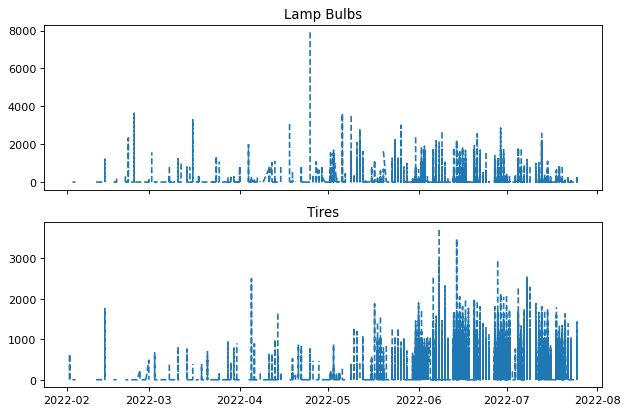

In [10]:
# LINE PLOT? 
# X VALUE: id0d92_svcs_open_y (dat_romart)
# Y VALUE 2 (repair orders):  id0d92_svc_tot_a (dat_romart)
# Y VALUE 1 (marketing dollars): PLACEMENTTOTALPLANNEDMEDIACOST


#plt.subplots(1,1,figsize=(16,9), dpi= 80)

romart_dat2022 = dat_romart[dat_romart['id0d92_svcs_open_y'] > '2022-02-01']
cmdat_2022 = dat_cm360[(dat_cm360['STARTDATE'] > '2022-02-01') & (dat_cm360['STARTDATE'] <= '2022-08-01')]

romart_dat2022 = romart_dat2022.sort_values(['id0d92_svcs_open_y'], ascending=[True])
cmdat_2022 = cmdat_2022.sort_values(['STARTDATE'], ascending=[True])
# define x and y's




x1 = romart_dat2022['id0d92_svcs_open_y']
y1 = romart_dat2022['id0d92_lamps_bulbs_prt_a']

x2 = romart_dat2022['id0d92_svcs_open_y']
y2 = romart_dat2022['id0d92_tire_prt_a']

# Creates two axes, and accesses them through the returned array

fig, axes = plt.subplots(2, 1,figsize=(9,6), dpi= 80, sharex = 'col')
axes[0].plot(x1, y1, '--')
axes[0].set_title('Lamp Bulbs')
axes[1].plot(x2, y2, '--')
axes[1].set_title('Tires')
plt.show()





In [11]:
# making sure time intervals match aross data sets

romart_range = str(romart_dat2022['id0d92_svcs_open_y'].dt.date.min()) + ' to ' +str(romart_dat2022['id0d92_svcs_open_y'].dt.date.max())
display("RO MART range is:", romart_range)

cm360_range = str(cmdat_2022['STARTDATE'].dt.date.min()) + ' to ' +str(cmdat_2022['STARTDATE'].dt.date.max())
display("MARKETING range is:", cm360_range)

'RO MART range is:'

'2022-02-02 to 2022-07-25'

'MARKETING range is:'

'2022-02-02 to 2022-08-01'

In [12]:
n_cmdat = len(cmdat_2022)
n_cmdat

9575

In [13]:
# make sure dimensions match for Granger Analysis below

romart_dat2022_small = romart_dat2022.sample(n=n_cmdat, random_state=1234)
romart_dat2022_small = romart_dat2022_small.sort_values(['id0d92_svcs_open_y'], ascending=[True])

cmdat_2022 = cmdat_2022.sort_values(['STARTDATE'], ascending=[True])

# define x and y's
romart_dat2022_small.shape



(9575, 349)

In [14]:
# GRAB TOP TEN PARTS

is_part = dat_romart.columns.str.contains(".prt.", case=False)

part_cols = list(dat_romart.columns[is_part])

parts_df = romart_dat2022_small[part_cols]

top_fiddy(parts_df)



id0d92_drivd_dept_s_prts_a        1823398.44
id0d92_ro_tot_prts_a              1538505.94
id0d92_tot_dlr_prts_cost_a        1537871.89
id0d92_prt_role_frd_lbr_abs_a     1349530.34
id0d92_prt_role_frd_lbr_pv_a      1348524.43
id0d92_prt_role_frd_lbr_a         1347518.52
id0d92_lbrdr_rpr_cust_prts_a      1310015.65
id0d92_rpr_typ_cust_prts_a        1252922.16
id0d92_prt_role_moto_lbr_abs_a    1051837.47
id0d92_prt_role_moto_lbr_pv_a     1050913.13
id0d92_prt_role_moto_lbr_a        1049988.79
id0d92_prt_role_frd_prt_a         1046635.87
id0d92_react_cat_05_prt_a          659626.86
id0d92_prt_role_oth_lbr_abs_a      594528.07
id0d92_prt_role_oth_lbr_a          594528.07
id0d92_prt_role_oth_lbr_pv_a       594528.07
id0d92_rpr_typ_wrnty_prts_a        433544.05
id0d92_lbrdr_rpr_wrnty_prts_a      432890.68
id0d92_prt_role_moto_prt_a         322145.95
id0d92_rpr_typ_intrnl_prts_a       312261.38
id0d92_lbrdr_rpr_intrnl_prts_a     312124.63
id0d92_prt_role_oth_prt_a          311454.77
id0d92_rea

In [ ]:
"""
# Question: under what conditions does <spend> predict/forecast <service total amounts>?
# Controlling for the 

Possible vars for ARIMA multivariate model
Y:
id0d92_svc_tot_a: SERVICE TOTAL AMOUNT

X:
id0d92_rpr_typ_wrnty_prts_a: WARRANTY RPR TYPE PARTS AMOUNT
id0d92_make_n: VEHICLE MAKE NAME
PLACEMENTTOTALPLANNEDMEDIACOST: "spend"





"""

In [ ]:
romart_dat2022_f150 = romart_dat2022.id0d92_vmdl_desc_x == 'F-150'
f150_df = romart_dat2022[romart_dat2022_f150]
f150_df = f150_df.sort_values(['id0d92_svcs_open_y'], ascending=[True])
#print(f15_df.shape)
part1 = 'id0d92_tire_prt_a'
part2 = 'id0d92_transmission_prt_a'


In [ ]:
y2

In [ ]:
# BEGINNING OF GRANGER CAUSALITY
# DOCUMENTATION IS DOPE: ?grangercausalitytests
# https://en.wikipedia.org/wiki/Granger_causality
# not a test for casuality, but rather, a test for precedence
# does X contain information useful in forecasting Y?


x = romart_dat2022['id0d92_svcs_open_y']
y1 = romart_dat2022[part1]
y2 = romart_dat2022[part2]

#df = pd.DataFrame()
#df['spend'] = cmdat_2022['PLACEMENTTOTALPLANNEDMEDIACOST']
#df[part] = f15_df[part]
#display(df.head())

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,10))
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Tires', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)
ax1.set_title("Tire and Transmission Orders (F-150)", fontsize=22)


# ax2 (right Y axis)
ax2.set_ylabel("Transmission", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_ylabel('Transmission', color='tab:blue', fontsize=20)
#ax2.set_title("This is a plot", fontsize=22)
fig.tight_layout()
plt.show()










In [ ]:
#?grangercausalitytests
maxlag = 12
test   = 'lrtest' # F-distribution assumes normality and is better for smaller sample sizes...
#df.dropna(subset=['ro_rotor_drums'], inplace=True)

#Finding the mean of the column having NaN
mean_value = df[part].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df[part].fillna(value=mean_value, inplace=True)


display(df.shape)
display(df.head())

In [ ]:
grangers_causation_matrix(df, variables = df.columns)

In [ ]:
# Keeping only Ford Top Ten Makes

romart22_ford = romart_dat2022[romart_dat2022['id0d92_make_n'] == 'FORD']
romart22_ford.id0d92_vmdl_desc_x.unique()

groupedDF = romart22_ford.groupby('id0d92_vmdl_desc_x',sort=False).count()
sortedDF = groupedDF.sort_values('id0d92_make_n', ascending=False)['id0d92_make_n']
print(sortedDF[0:10])

"""
F-150         20238
ESCAPE         9533
EXPLORER       9188
F-250          4823
EDGE           4785
FUSION         4783
F-350          3322
EXPEDITION     2701
MUSTANG        2433
FOCUS          2416
"""
makes = ['F-150', 'ESCAPE', 'EXPLORER', 'F-250', 'EDGE', 'FUSION', 'F-350', 'EXPEDITION', 'MUSTANG', 'FOCUS']

In [ ]:
# run function on models, one at a time
explore_model('F-150')

In [ ]:


# GRAB TOP TEN PARTS BY MAKE
"""
is_part = temp_df.columns.str.contains(".prt.", case=False)
part_cols = list(temp_df.columns[is_part])
parts_df = temp_df[part_cols]

top_fiddy(parts_df)
"""




In [ ]:
make_n_parts = {}



focus = ['id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_ac_prt_a','id0d92_battery_prt_a','id0d92_chassis_prt_a']

mustang = ['id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_ac_prt_a','id0d92_battery_prt_a',
           'id0d92_oil_filter_prt_a']

expedition = ['id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_ac_prt_a','id0d92_lamps_bulbs_prt_a',
              'id0d92_rotors_drums_prt_a']

f350 = ['id0d92_transmission_prt_a','id0d92_tire_prt_a','id0d92_chassis_prt_a','id0d92_oil_filter_prt_a','id0d92_ac_prt_a']

fusion = ['id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_rotors_drums_prt_a','id0d92_chassis_prt_a',
          'id0d92_brake_prt_a']

edge = ['id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_oil_filter_prt_a','id0d92_lamps_bulbs_prt_a','id0d92_ac_prt_a']

f250 = ['id0d92_tire_prt_a','id0d92_oil_filter_prt_a','id0d92_battery_prt_a','id0d92_transmission_prt_a',
       'id0d92_air_filter_prt_a']

explorer = ['id0d92_steering_susp_prt_a', 'id0d92_tire_prt_a','id0d92_transmission_prt_a','id0d92_ac_prt_a',
            'id0d92_lamps_bulbs_prt_a']

escape = ['id0d92_tire_prt_a', 'id0d92_transmission_prt_a', 'id0d92_brake_prt_a', 'id0d92_lamps_bulbs_prt_a',
         'id0d92_oil_filter_prt_a']

f150 = ['id0d92_tire_prt_a', 'id0d92_transmission_prt_a', 'id0d92_rotors_drums_prt_a',
                        'id0d92_brake_prt_a', 'id0d92_ac_prt_a']

make_n_parts['FOCUS'] = focus
make_n_parts['MUSTANG'] = mustang
make_n_parts['EXPEDITION'] = expedition
make_n_parts['F-350'] = f350
make_n_parts['FUSION'] = fusion
make_n_parts['F-250'] = f250
make_n_parts['EXPLORER'] = explorer
make_n_parts['ESCAPE'] = escape
make_n_parts['F-150'] = f150
make_n_parts['EDGE'] = edge


In [ ]:
make_n_parts

In [ ]:
# ['F-150', 'ESCAPE', 'EXPLORER', 'F-250', 'EDGE', 'FUSION', 'F-350', 'EXPEDITION', 'MUSTANG', 'FOCUS']
#warnings.filterwarnings("ignore", category=ValueWarning)
import warnings
warnings.filterwarnings('ignore')

def parts_gc(car):
    
    CAR = car.upper()
    print("THE CAR WE ARE LOOKING AT IS:", CAR)
    
    parts_list = make_n_parts[CAR]
    
    temp_df = romart22_ford[romart22_ford.id0d92_vmdl_desc_x == CAR]
    temp_df2 = temp_df.loc[:, temp_df.columns.isin(parts_list)]
    temp_df2['spend'] = cmdat_2022['PLACEMENTTOTALPLANNEDMEDIACOST']
    temp_df2.fillna(method='bfill', inplace=True)
    temp_df2.dropna(subset=['spend'], inplace=True)
    #df.loc[:, df.columns.isin(list('BCD'))]
    temp_df2.head()
    
    gc_mtrx = grangers_causation_matrix(temp_df2, variables = temp_df2.columns)
    display(gc_mtrx)
    return gc_mtrx


f150_gc = parts_gc('F-150')
escape_gc = parts_gc('ESCAPE')
explorer_gc = parts_gc('EXPLORER')
f250_gc = parts_gc('F-250')
edge_gc = parts_gc('EDGE')
fusion_gc = parts_gc('FUSION')
f350_gc = parts_gc('F-350')
expedite_gc = parts_gc('EXPEDITION')
mustang_gc = parts_gc('MUSTANG')
focus_gc = parts_gc('FOCUS')

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('RO_granger_pvals.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.


f150_gc.to_excel(writer, sheet_name='F-150')
escape_gc.to_excel(writer, sheet_name='ESCAPE')
explorer_gc.to_excel(writer, sheet_name='EXPLORER')
f250_gc.to_excel(writer, sheet_name='F-250')
edge_gc.to_excel(writer, sheet_name='EDGE')
fusion_gc.to_excel(writer, sheet_name='FUSION')
f350_gc.to_excel(writer, sheet_name='F-350')
expedite_gc.to_excel(writer, sheet_name='EXPEDITION')
mustang_gc.to_excel(writer, sheet_name='MUSTANG')
focus_gc.to_excel(writer, sheet_name='FOCUS')

# Close the Pandas Excel writer and output the Excel file.
writer.close()

In [ ]:
len(cmdat_2022['PLACEMENTTOTALPLANNEDMEDIACOST'])

In [ ]:
# ITERATING OVER THIS DOPE ASS DICTIONARY AND TESTING GRANGER CAUSALITY 
# testing for temporal precedence, not causality

for key, value in make_n_parts.items():
    
    print(key)
    temp_df = romart22_ford[romart22_ford.id0d92_vmdl_desc_x == key]
    #print(temp_df['id0d92_vmdl_desc_x'].head())
    
    n_temp_df = len(temp_df)
    n_cmdat = len(cmdat_2022) # should be 3169
    
    #display('size of dataframe is: ', n_temp_df)
    #display('size of cmdat_2022 is: ', n_cmdat)
    
    df = pd.DataFrame()
    
    # make sure series are equal in length
    if n_cmdat > n_temp_df:
        df['spend'] = cmdat_2022['PLACEMENTTOTALPLANNEDMEDIACOST'].sample(n=n_temp_df, random_state=1234)
            
    if n_cmdat < n_temp_df:
        temp_df = temp_df.sample(n=n_cmdat, random_state=1234)    
        df['spend'] = cmdat_2022['PLACEMENTTOTALPLANNEDMEDIACOST']
    
    
    print(len(temp_df))
    
    for v in value:
        display(v)
        print(len(df))
        df['part'] = temp_df[v]
  
        # Replace NaNs in column S2 with the
        # mean of values in the same column
        mean_value = df['part'].mean()
        df['part'].fillna(value=mean_value, inplace=True, limit=100)
        display(df.head())
        
        try:
            grangers_causation_matrix(df, variables = df.columns)

        except ValueError:
            print('lol, nope!')
        
    
               
    #df[part] = romart_dat2022_small[part]
    #display(df.head())

In [ ]:
for key, value in make_n_parts.items():
    print(key)
    part = value
    print(part)

In [ ]:

# function for plotting and saving a bunch of variables along the same temporal axis

def plot_and_save(df, var_list, time_var):

    df1 = df.sort_values([time_var], ascending=[True])
    
    # Creates two polar axes, and accesses them through the returned array
    fig, axes = plt.subplots(6, 1, sharex = 'col', figsize=(10, 10))
    #plt.title(model + ': Top Five Parts Ordered')
    
    axes[0].plot(df1[time_var], df1[var_list[0]], '--')
    axes[0].set_title(var_list[0])
    
    axes[1].plot(df1[time_var], df1[var_list[1]], '--')
    axes[1].set_title(var_list[1])
    
    axes[2].plot(df1[time_var], df1[var_list[2]], '--')
    axes[2].set_title(var_list[2])
    
    axes[3].plot(df1[time_var], df1[var_list[3]], '--')
    axes[3].set_title(var_list[3])
    
    axes[4].plot(df1[time_var], df1[var_list[4]], '--')
    axes[4].set_title(var_list[4])
    
    axes[5].plot(x2, y2, '--')
    axes[5].set_title('Planned Media Cost (General)')
    fig.tight_layout() 
    plt.show()
    return fig

plot_and_save(temp_df, parts, 'id0d92_svcs_open_y')
   


In [ ]:
axes[5]

In [ ]:
# Downsample both datasets to prevent memory error
rando = 1234

dat_romart_sub = dat_romart.sample(n=10000, random_state = rando) 
dat_cm360_sub = dat_cm360.sample(n=10000, random_state = rando)

display("New shape of CM 360:", dat_cm360_sub.shape)
display("New shape of RO Mart:", dat_romart_sub.shape)

In [ ]:
# MERGE HERE

merged_data = dat_romart_sub.merge(dat_cm360_sub, on='DMA', how = 'inner')

print("Merged data (inner join):")
print(merged_data)

In [ ]:
merged_data.shape

In [ ]:
# id0d92_svc_tot_a

merged_data.dropna(axis='rows', subset=['id0d92_svc_tot_a'], inplace=True)
merged_data = merged_data[merged_data.id0d92_svc_tot_a > 0]

In [ ]:
merged_data.shape

In [ ]:
corr_data = merged_data.corr()


In [ ]:
corr_data

In [ ]:
corr_data['id0d92_svc_tot_a']

In [ ]:
merged_data['id0d92_svc_tot_a'].describe()
# data is suuuper spread out (look at standard deviation)

In [ ]:
merged_data['id0d92_svc_tot_a'].hist(bins=10, range=[0, 1000])

In [ ]:
merged_data['id0d92_svc_tot_a'].mode() # average is 540 but modal value is 80
# most people pay for about 80 worth of repairs but the steady stream of more expensive repairs ()

In [ ]:
# finding that variables that show linear correlation with our Y var

possible_vars = corr_data[(corr_data['id0d92_svc_tot_a'] > .4) & (corr_data['id0d92_svc_tot_a'] < .75)]
possible_vars




In [ ]:
keeper_vars = list(possible_vars[['id0d92_svc_tot_a']].index)
keeper_vars

In [ ]:

possible_vars = corr_data.loc[keeper_vars]
possible_vars

In [ ]:
possible_vars['id0d92_svc_tot_a'].plot.barh()

In [ ]:
merged_data_n = merged_data.shape[0]
test_n = int(.2 * merged_data_n)
train_n = int(merged_data_n - test_n)


In [ ]:
train_n

In [ ]:
# Dealing with NaN's
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data = merged_data.fillna(method='bfill', limit = 25)
merged_data = merged_data.dropna(axis='columns', thresh=.75)

In [ ]:
merged_data.describe()

In [ ]:
# Dealing with Float64 variables (too big for the regression)

# Select columns with 'float64' dtype  
float64_cols = list(merged_data.select_dtypes(include='float64'))

# The same code again calling the columns
merged_data[float64_cols] = merged_data[float64_cols].astype('float16')



In [ ]:
y = merged_data[['id0d92_svc_tot_a']]
X = merged_data[keeper_vars]

In [ ]:
time_plot = merged_data.plot.line(x='id0d92_svcs_open_y')


In [ ]:
# Split the data into training/testing sets
merged_X_train = X[:-test_n]
merged_X_test = X[-test_n:]

# Split the targets into training/testing sets
merged_y_train = y[:-test_n]
merged_y_test = y[-test_n:]

In [ ]:
merged_y_test.shape

In [ ]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(merged_X_train, merged_y_train)

# Make predictions using the testing set
merged_y_pred = regr.predict(merged_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(merged_y_test, merged_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(merged_y_test, merged_y_pred))



In [ ]:
fcsd_X_train

In [ ]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(fcsd_X_test[['MEDIACOST']].values, fcsd_X_test[['DARTCOST']].values, fcsd_y_test.values, color = "green")
plt.title("Costs versus Impressions")
ax.set_xlabel('Media', fontweight ='bold')
ax.set_ylabel('Dart', fontweight ='bold')
ax.set_zlabel('US Impressions', fontweight ='bold')
plt.axis([0, 15, 0, 15])
# show plot
plt.show()

In [ ]:
plt.plot(fcsd_X_test, fcsd_y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
name = fcsd_X_train['car'].head(12)
price = fcsd_X_train['price'].head(12)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()